In [1]:
import pandas as pd
import os 
import sys
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pytz

sys.path.insert(0,'../archiver-py/')

from archiver import Archiver

In [4]:
archiver = Archiver()
# manual
start = datetime.strptime('2019-5-25 15:29:00', '%Y-%m-%d %H:%M:%S')  # or 'fromisoformat' for v3.7+
end = datetime.strptime('2019-5-25 15:59:00', '%Y-%m-%d %H:%M:%S')

start = pytz.utc.localize(start)
end = pytz.utc.localize(end)

timesH, valuesH, metaH = archiver.downloadScalar('COSY:DBLM:03:RP:ADC:A', start, end)


TypeError: the JSON object must be str, not 'bytes'

In [2]:
df_EPICS = pd.DataFrame()

PATH_TO_DATA = '/home/marius/Jülich/Misc/Beamtime_MLT_BPM/'

for filename in os.listdir(PATH_TO_DATA):
    #run = filename.split('_')[0].strip('#')
    df_temp = pd.read_csv(
        PATH_TO_DATA + filename,
        header = None, usecols = [0,3],
        names = ['PV', 'signal']
    )
    
    #df_temp['run_number'] = int()
    
    df_EPICS_54 = df_temp[df_temp['PV'] == 'NESP:DIAG:lockin54:MEAN:1']
    df_EPICS_20 = df_temp[df_temp['PV'] == 'NESP:DIAG:lockin20:MEAN:1']
    
    print(filename)
    print(df_EPICS_54.mean())
    print(df_EPICS_20.mean())
    
    


#4.csv
signal    0.000018
dtype: float64
signal    0.000011
dtype: float64
#6.csv
signal    0.00002
dtype: float64
signal    0.000012
dtype: float64
#8.csv
PV       NaN
signal   NaN
dtype: float64
PV       NaN
signal   NaN
dtype: float64
#5.csv
signal    0.00003
dtype: float64
signal    0.000022
dtype: float64


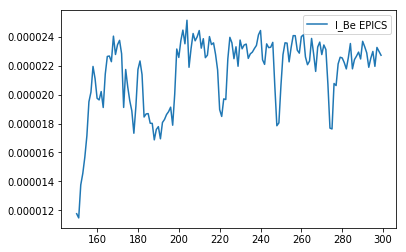

In [64]:
df_EPICS_20.plot(y='I_Be EPICS')
plt.show()